In [99]:
import chardet
import matplotlib.pyplot as plt
import pandas as pd
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
# Make plotly work with Jupyter notebook
init_notebook_mode(connected=True)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pyspark

In [2]:
# 강릉 목포 전주 타겟
# 테이블 정의서
pd.read_excel('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KORAIL)플랫폼통합경진대회 데이터/한국철도공사 테이블 정의서.xlsx')

데이터셋               Unnamed: 1  Unnamed: 2 Unnamed: 3  \
0   데이터 상품 정보                   역 위치정보         NaN        NaN   
1        관리기관                   한국철도공사         NaN     데이터 기간   
2         키워드  KORAIL,역명, 역위치정보, GPS좌표         NaN        NaN   
3         NaN                      NaN         NaN        NaN   
4         테이블                      NaN         NaN        NaN   
5    테이블명(한글)                   역 위치정보         NaN   테이블명(영문)   
6     컬럼명(한글)                  컬럼명(영문)       컬럼 설명     코드값 여부   
7        노선이름                     LINE     열차노선 구분          N   
8         역이름                  STATION          역명          N   
9         역주소                  ADDRESS       역주소정보          N   
10         경도               LONGTITUDE  역 위치정보(경도)          N   
11         위도                 LATITUDE  역 위치정보(위도)          N   

         Unnamed: 4 Unnamed: 5  
0               NaN        NaN  
1                 -        NaN  
2               NaN        NaN  
3               NaN        NaN  
4               NaN        NaN  
5                 -        NaN  
6            예시 데이터         비고  
7          고속/일반/광역        NaN  
8               서울역        NaN  
9   서울시 중구 한강대로 405        NaN  
10       126.123456        NaN  
11        37.554743        NaN

In [3]:
korail_customer_2019 = pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KORAIL)플랫폼통합경진대회 데이터/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2019.csv')

korail_customer_2020 = pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KORAIL)플랫폼통합경진대회 데이터/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2020.csv')

korail_customer_2021 = pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KORAIL)플랫폼통합경진대회 데이터/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2021.csv')

In [32]:
station_result_2018 = pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KORAIL)플랫폼통합경진대회 데이터/역별 승하차실적_2018.csv')

In [34]:
station_addr = pd.read_excel('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KORAIL)플랫폼통합경진대회 데이터/역별 주소정보.xlsx')


In [90]:
station_addr

GUBUN LINE  STATION                     ADDRESS  LONGTITUDE   LATITUDE  \
0      광역  경부선  가산디지털단지       서울특별시 금천구 가산동 벚꽃로 309  126.882689  37.481505   
1      여객  가야선       가야             부산 부산진구 백양대로 91  129.039744  35.160446   
2      광역  경춘선       가평       경기도 가평군 가평읍 문화로 13-42  127.510842  37.814459   
3      여객  호남선       강경      충남 논산시 강경읍 대흥로 1 강경역무실  127.015992  36.153991   
4      여객  동해선       강구         경상북도 영덕군 강구면 강산로 67  129.370110  36.352495   
..    ...  ...      ...                         ...         ...        ...   
288    여객  경부선       황간  충북 영동군 황간면 하옥포2길 14  황간역무실  127.912289  36.224222   
289    광역  경원선       회기       서울시 동대문구 회기로 196(휘경동)  127.056409  37.588837   
290    광역  경원선       회룡            경기도 의정부시 평화로 363  127.047466  37.724344   
291    여객  경강선       횡성         강원도 횡성군 횡성읍 덕고로 591  128.007793  37.483013   
292    여객  경전선       효천             광주 남구 송하동 573-8  126.877114  35.102955   

    CITY  
0     서울  
1     부산  
2     가평  
3     논산  
4     영덕  
..   ...  
288   영동  
289   서울  
290  의정부  
291   횡성  
292   광주  

[293 rows x 7 columns]

In [ ]:
# encoding and save & load

In [ ]:
# EDA
# 상하행선 distribution
# 하행 = 0 , 상행 = 1
# 역별 승하차실적 해당 운행노선의 정차역별로 총 승하차 실적만 나온다
station_result_2018

station_result_2018['상행하행구분'] = station_result_2018['상행하행구분'].apply(lambda x: 1 if x == '상행' else 0)

In [43]:
station_result_2018


운행일자 운행영업일단계 주운행선  상행하행구분   역무열차종  정차역  메트릭   승차인원수  하차인원수
0       2018년 01월 01일     공휴일  경부선       0     KTX   서울  NaN  20,699     90
1       2018년 01월 01일     공휴일  경부선       0     KTX   용산  NaN   1,907      0
2       2018년 01월 01일     공휴일  경부선       0     KTX  영등포  NaN     173      0
3       2018년 01월 01일     공휴일  경부선       0     KTX   수원  NaN   1,674     44
4       2018년 01월 01일     공휴일  경부선       0     KTX   대전  NaN   3,015  5,302
...               ...     ...  ...     ...     ...  ...  ...     ...    ...
587751  2018년 12월 31일      평일  강릉선       1  KTX-호남   상봉  NaN       3    434
587752  2018년 12월 31일      평일  강릉선       1  KTX-호남   횡성  NaN     176     22
587753  2018년 12월 31일      평일  강릉선       1  KTX-호남   둔내  NaN     148     15
587754  2018년 12월 31일      평일  강릉선       1  KTX-호남   평창  NaN     233     46
587755  2018년 12월 31일      평일  강릉선       1  KTX-호남   진부  NaN     456     24

[587756 rows x 9 columns]

In [67]:
"""
preprocess
"""
#

# , 제거 후 int()함수

In [ ]:
station_result_2018['하차인원수'] = station_result_2018.하차인원수.apply(lambda x: x.replace(',',''))
station_result_2018['승차인원수'] = station_result_2018.승차인원수.apply(lambda x: x.replace(',',''))

In [78]:
station_result_2018['하차인원수'] = station_result_2018['하차인원수'].astype('float')

dtype('float64')

In [82]:
station_result_2018[['주운행선','하차인원수']].groupby('주운행선')['하차인원수'].sum()

주운행선
강릉선       4573834.0
경부선      63407851.0
경북선       1745170.0
경원선        403535.0
경의선         44134.0
경전선       7555906.0
경춘선       6172746.0
공항철도       328341.0
대구선        373435.0
동해남부선     3748608.0
동해선       7141418.0
미소속선         6438.0
안산선           894.0
영동선        899459.0
장항선       7163923.0
전라선      13155402.0
중앙선       3154644.0
충북선       2184181.0
태백선       1844334.0
호남선      17352090.0
Name: 하차인원수, dtype: float64

In [84]:
# 안산에서 타고
station_result_2018[station_result_2018['주운행선'] == '안산선']

운행일자 운행영업일단계 주운행선  상행하행구분 역무열차종 정차역  메트릭 승차인원수  하차인원수
407997  2018년 09월 09일      표준  안산선       0  새마을호  춘천  NaN     0  447.0
407998  2018년 09월 09일      표준  안산선       0  새마을호  안산  NaN   447    0.0
407999  2018년 09월 09일      표준  안산선       1  새마을호  춘천  NaN   447    0.0
408000  2018년 09월 09일      표준  안산선       1  새마을호  안산  NaN     0  447.0

In [ ]:
# 실수문자열이나 object 나올 시에 float 후 int 하여 정수로 변환

In [50]:
station_result_2018['하차인원수'].astype('float')

주운행선
강릉선      00326010785,1889161852333212972904,9071294,244...
경부선      9000445,3028,3321293601,95513,5871,4600841,812...
경북선      1211500382416430153832702325339077305281110011...
경원선      0008221427602106011000000027655346460221314000...
경의선      0004414255000022611116000006311223200002562135...
경전선      310458766165680271212757262182161191,861001303...
경춘선      000296512991,319361132,7572,2107,126793642,908...
공항철도     2600421200006127500080462000741693009626400010...
대구선      0150636591112146514121019129002491274901112450...
동해남부선    017696262358474531,294178306250524511215625409...
동해선      531873680031121979791704365783000315514201,759...
미소속선     1463203955154620392174620392174620392171122125...
안산선                                               44700447
영동선      6044131074681045010531082091871286223168930370...
장항선      0011274233330165263103196741513031668123511720...
전라선      009744414551,028206362892148359099072223200469...
중앙선      032690646551,04588336118011209349536114137

In [87]:
station_addr

GUBUN LINE  STATION                     ADDRESS  LONGTITUDE   LATITUDE  \
0      광역  경부선  가산디지털단지       서울특별시 금천구 가산동 벚꽃로 309  126.882689  37.481505   
1      여객  가야선       가야             부산 부산진구 백양대로 91  129.039744  35.160446   
2      광역  경춘선       가평       경기도 가평군 가평읍 문화로 13-42  127.510842  37.814459   
3      여객  호남선       강경      충남 논산시 강경읍 대흥로 1 강경역무실  127.015992  36.153991   
4      여객  동해선       강구         경상북도 영덕군 강구면 강산로 67  129.370110  36.352495   
..    ...  ...      ...                         ...         ...        ...   
288    여객  경부선       황간  충북 영동군 황간면 하옥포2길 14  황간역무실  127.912289  36.224222   
289    광역  경원선       회기       서울시 동대문구 회기로 196(휘경동)  127.056409  37.588837   
290    광역  경원선       회룡            경기도 의정부시 평화로 363  127.047466  37.724344   
291    여객  경강선       횡성         강원도 횡성군 횡성읍 덕고로 591  128.007793  37.483013   
292    여객  경전선       효천             광주 남구 송하동 573-8  126.877114  35.102955   

    CITY  
0     서울  
1     부산  
2     가평  
3     논산  
4     영덕  
..   ...  
288   영동  
289   서울  
290  의정부  
291   횡성  
292   광주  

[293 rows x 7 columns]

In [39]:
station_result_2018

운행일자 운행영업일단계 주운행선  상행하행구분   역무열차종  정차역  메트릭   승차인원수  하차인원수
0       2018년 01월 01일     공휴일  경부선       0     KTX   서울  NaN  20,699     90
1       2018년 01월 01일     공휴일  경부선       0     KTX   용산  NaN   1,907      0
2       2018년 01월 01일     공휴일  경부선       0     KTX  영등포  NaN     173      0
3       2018년 01월 01일     공휴일  경부선       0     KTX   수원  NaN   1,674     44
4       2018년 01월 01일     공휴일  경부선       0     KTX   대전  NaN   3,015  5,302
...               ...     ...  ...     ...     ...  ...  ...     ...    ...
587751  2018년 12월 31일      평일  강릉선       1  KTX-호남   상봉  NaN       3    434
587752  2018년 12월 31일      평일  강릉선       1  KTX-호남   횡성  NaN     176     22
587753  2018년 12월 31일      평일  강릉선       1  KTX-호남   둔내  NaN     148     15
587754  2018년 12월 31일      평일  강릉선       1  KTX-호남   평창  NaN     233     46
587755  2018년 12월 31일      평일  강릉선       1  KTX-호남   진부  NaN     456     24

[587756 rows x 9 columns]

<AxesSubplot:xlabel='하차인원수', ylabel='count'>

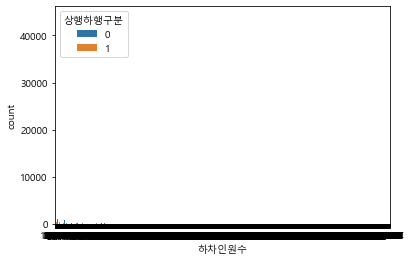

In [40]:
# 열차는 동일하게 움직이지만 탑승인원수
sns.countplot( x='하차인원수' ,hue='상행하행구분', data=station_result_2018)

In [ ]:
#하행선



In [5]:
# 비회원 - > 0
# 회원 - > encoding
korail_customer_2019['구분'] = korail_customer_2019['구분'].apply(lambda x: 1 if x == '회원' else 0)

In [6]:
# 요일별 고객 수를 확인하자 !!!!!!!!!!!!




In [7]:
#day_values = korail_customer_2019['운행요일'].value_counts()

In [8]:
#day_values.plot.bar()


In [9]:
#sns.barplot(x="day", y="total_bill", hue="sex", data=day_values)

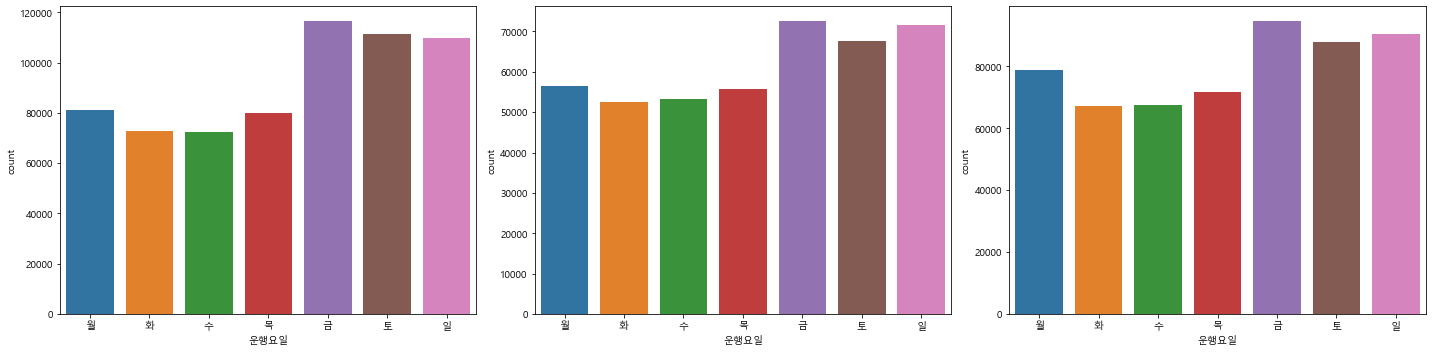

In [10]:
#


fig ,ax = plt.subplots(1,3 ,figsize=(20,5))
# 연도별 요일별 count
sorted_keys = ['월', '화', '수', '목', '금', '토', '일'] #

sns.countplot(x='운행요일', data =korail_customer_2019 , order= sorted_keys,ax=ax[0])

sns.countplot(x='운행요일', data =korail_customer_2020 , order= sorted_keys,ax=ax[1])

sns.countplot(x='운행요일', data =korail_customer_2021 , order= sorted_keys,ax=ax[2])
plt.tight_layout()

In [11]:
# 성별이나 나이대가 표시되지 않은 사람 스케일링

# 연령분포
# distribution of age

In [12]:
age_distribution_2019 = korail_customer_2019['연령대'].value_counts().sort_index()

In [13]:
age_distribution_2019

0~19세      27217
20~29세    122730
30~39세    114027
40~49세    115910
50~59세     93676
60~64세     31361
65세이상      28095
기타        111257
Name: 연령대, dtype: int64

In [14]:
# Create Trace

trace = go.Bar(x = age_distribution_2019.index  ,
                    y= age_distribution_2019.values  , marker=dict(color='#074263'))
layout = dict(title = '2019 age_distribution '
               ,xaxis = dict(title = 'Age') ,
               yaxis = dict(title = 'Count'))
fig = go.Figure(data =[trace] , layout=layout)
iplot(fig)

In [15]:
#go.Histogram(data = age_distribution,
         #    xbins=dict(start =0 , end=))

In [16]:
#korail_customer_2019['연령대'].iplot(kind='hist')

In [17]:
#trace = go.Histogram()

age_distribution_2020 = korail_customer_2020['연령대'].value_counts().sort_index()

In [18]:
age_distribution_2020

trace = go.Bar(x = age_distribution_2020.index  ,
                    y= age_distribution_2020.values  , marker=dict(color='#3D85C6'))
layout = dict(title = '2020 age_distribution '
               ,xaxis = dict(title = 'Age') ,
               yaxis = dict(title = 'Count'))
fig = go.Figure(data =[trace] , layout=layout)
iplot(fig)


In [19]:
age_distribution_2021 = korail_customer_2021['연령대'].value_counts().sort_index()

In [24]:
# 어떤 요인과 함께 여행객이 다시 늘었는지 또
age_distribution_2021

trace = go.Bar(x = age_distribution_2021.index  ,
                    y= age_distribution_2021.values  , marker=dict(color='#0B5394'))
layout = dict(title = '2021 age_distribution '
               ,xaxis = dict(title = 'Age') ,
               yaxis = dict(title = 'Count'))
fig = go.Figure(data =[trace] , layout=layout)
iplot(fig)


In [28]:

# 기타 연령대 추정하기
korail_customer_2019[korail_customer_2019['연령대']=='기타']

운행일자 운행요일  구분  출발시간대   성별 연령대 고객등급_현재    출발역코드 출발역명    도착역코드  \
0       20190301    금   0    0.0  NaN  기타     NaN  3900248   전주  3900211   
1       20190301    금   0    0.0  NaN  기타     NaN  3900248   전주  3900259   
2       20190301    금   0    0.0  NaN  기타     NaN  3900248   전주  3900279   
3       20190301    금   0    2.0  NaN  기타     NaN  3900248   전주  3900276   
4       20190301    금   0    2.0  NaN  기타     NaN  3900248   전주  3900259   
...          ...  ...  ..    ...  ...  ..     ...      ...  ...      ...   
643219  20190531    금   1   17.0    M  기타       F  3900025   용산  3900248   
643220  20190531    금   1   17.0    M  기타       F  3900388  청량리  3900587   
643517  20190531    금   1   18.0    M  기타       F  3900898   상봉  3900587   
643915  20190531    금   1   20.0    M  기타       F  3900388  청량리  3900587   
644069  20190531    금   1   21.0    M  기타       F  3900361   행신  3900242   

         도착역명 상하행구분    노선  역무열차종코드   역무열차종  인원  운행일자(월별)  
0          익산     U   943        2    무궁화호  12    201903  
1          남원     D  1040        2    무궁화호   4    201903  
2       여수엑스포     D  1040        2    무궁화호   1    201903  
3          여천     D  1040        2    무궁화호   3    201903  
4          남원     D  1040        2    무궁화호   4    201903  
...       ...   ...   ...      ...     ...  ..       ...  
643219     전주     D  1786        7  KTX-산천   2    201905  
643220     강릉     D  2041       10  KTX-호남   1    201905  
643517     강릉     D  2041       10  KTX-호남   1    201905  
643915     강릉     D  2041       10  KTX-호남   1    201905  
644069     목포     D  1773        0     KTX   1    201905  

[111257 rows x 17 columns]

In [88]:
table_definition = pd.read_excel('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KORAIL)플랫폼통합경진대회 데이터/한국철도공사 테이블 정의서.xlsx')

In [89]:
table_definition

데이터셋               Unnamed: 1  Unnamed: 2 Unnamed: 3  \
0   데이터 상품 정보                   역 위치정보         NaN        NaN   
1        관리기관                   한국철도공사         NaN     데이터 기간   
2         키워드  KORAIL,역명, 역위치정보, GPS좌표         NaN        NaN   
3         NaN                      NaN         NaN        NaN   
4         테이블                      NaN         NaN        NaN   
5    테이블명(한글)                   역 위치정보         NaN   테이블명(영문)   
6     컬럼명(한글)                  컬럼명(영문)       컬럼 설명     코드값 여부   
7        노선이름                     LINE     열차노선 구분          N   
8         역이름                  STATION          역명          N   
9         역주소                  ADDRESS       역주소정보          N   
10         경도               LONGTITUDE  역 위치정보(경도)          N   
11         위도                 LATITUDE  역 위치정보(위도)          N   

         Unnamed: 4 Unnamed: 5  
0               NaN        NaN  
1                 -        NaN  
2               NaN        NaN  
3               NaN        NaN  
4               NaN        NaN  
5                 -        NaN  
6            예시 데이터         비고  
7          고속/일반/광역        NaN  
8               서울역        NaN  
9   서울시 중구 한강대로 405        NaN  
10       126.123456        NaN  
11        37.554743        NaN

In [22]:
korail_customer_2019['운행일자(월별)'] = korail_customer_2019['운행일자'].apply(lambda x: int(str(x)[:6]))

<AxesSubplot:>

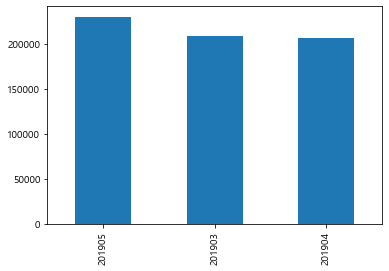

In [119]:
korail_customer_2019['운행일자(월별)'].value_counts().plot.bar()

In [116]:
# 연령별 선호하는 지역

kt_code_definition = pd.read_excel('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_코드정의서.xlsx')

In [119]:
kt_table_definition = pd.read_excel('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_테이블정의서_관광_시군구.xlsx')

In [169]:
kt_table_definition

데이터 항목 정의서\n(정형데이터)        Unnamed: 1       Unnamed: 2 Unnamed: 3  \
0               데이터셋 명               NaN    [시군구] 일별 관광객수        NaN   
1                   순번               항목명            항목 설명     Null여부   
2                    1    년월일\n(ETL_YMD)            기준년월일          N   
3                    2    시도명\n(SIDO_NM)              시도명          N   
4                    3   시도코드\n(SIDO_CD)             시도코드          N   
5                    4    시군구명\n(SGG_NM)             시군구명          N   
6                    5   시군구코드\n(SGG_CD)            시군구코드          N   
7                    6  현지인 관광객\n(I_CNT)  해당 시군구 현지인 관광객수          N   
8                    7  외지인 관광객\n(O_CNT)  해당 시군구 외지인 관광객수          N   
9                    8  외국인 관광객\n(F_CNT)  해당 시군구 외국인 관광객수          N   
10                   9               NaN              NaN        NaN   
11                  10               NaN              NaN        NaN   
12                  11               NaN              NaN        NaN   
13                  12               NaN              NaN        NaN   
14                  13               NaN              NaN        NaN   
15                  14               NaN              NaN        NaN   
16                  15               NaN              NaN        NaN   
17                  16               NaN              NaN        NaN   
18                  17               NaN              NaN        NaN   
19                  18               NaN              NaN        NaN   
20                  19               NaN              NaN        NaN   
21                  20               NaN              NaN        NaN   
22                  21               NaN              NaN        NaN   

   Unnamed: 4 Unnamed: 5 Unnamed: 6                      Unnamed: 7  \
0         NaN        파일명        NaN  (KT)고객사명_시군구명_시군구_1.일별관광객수.csv   
1         기본값         형식         단위                              규칙   
2          없음         숫자        NaN                        YYYYMMDD   
3          없음         문자        NaN                             NaN   
4          없음         숫자        NaN                              AA   
5          없음         문자        NaN                             NaN   
6          없음         숫자        NaN                           AAAAA   
7          없음         숫자          명                             NaN   
8          없음         숫자          명                             NaN   
9          없음         숫자          명                             NaN   
10        NaN        NaN        NaN                             NaN   
11        NaN        NaN        NaN                             NaN   
12        NaN        NaN        NaN                             NaN   
13        NaN        NaN        NaN                             NaN   
14        NaN        NaN        NaN                             NaN   
15        NaN        NaN        NaN                             NaN   
16        NaN        NaN        NaN                             NaN   
17        NaN        NaN        NaN                             NaN   
18        NaN        NaN        NaN                             NaN   
19        NaN        NaN        NaN                             NaN   
20        NaN        NaN        NaN                             NaN   
21        NaN        NaN        NaN                             NaN   
22        NaN        NaN        NaN                             NaN   

                                           Unnamed: 8 Unnamed: 9  
0                                                 NaN        NaN  
1                                            데이터 허용범위         비고  
2   20190301~20190531\n20200301~20200531\n20210301...        NaN  
3                                                 NaN        NaN  
4                                                  AA        NaN  
5                                                 NaN        NaN  
6                                               AAAAA        NaN  
7                                

운행일자 운행요일  구분  출발시간대   성별     연령대 고객등급_현재    출발역코드  출발역명    도착역코드  \
0       20190301    금   0    0.0  NaN      기타     NaN  3900248    전주  3900211   
1       20190301    금   0    0.0  NaN      기타     NaN  3900248    전주  3900259   
2       20190301    금   0    0.0  NaN      기타     NaN  3900248    전주  3900279   
3       20190301    금   0    2.0  NaN      기타     NaN  3900248    전주  3900276   
4       20190301    금   0    2.0  NaN      기타     NaN  3900248    전주  3900259   
...          ...  ...  ..    ...  ...     ...     ...      ...   ...      ...   
644268  20190531    금   1   23.0    M  50~59세       F  3900884  천안아산  3900242   
644269  20190531    금   1   23.0    M  60~64세       F  3900025    용산  3900242   
644270  20190531    금   1   23.0    M  60~64세       F  3900130    양평  3900587   
644271  20190531    금   1   23.0    M   65세이상       A  3900030   영등포  3900242   
644272  20190531    금   1   23.0    M   65세이상       F  3900030   영등포  3900242   

         도착역명 상하행구분    노선  역무열차종코드 역무열차종  인원  운행일자(월별)  
0          익산     U   943        2  무궁화호  12    201903  
1          남원     D  1040        2  무궁화호   4    201903  
2       여수엑스포     D  1040        2  무궁화호   1    201903  
3          여천     D  1040        2  무궁화호   3    201903  
4          남원     D  1040        2  무궁화호   4    201903  
...       ...   ...   ...      ...   ...  ..       ...  
644268     목포     D  1773        0   KTX   2    201905  
644269     목포     D  1563        2  무궁화호   2    201905  
644270     강릉     D  1963        2  무궁화호   1    201905  
644271     목포     D  1563        2  무궁화호   1    201905  
644272     목포     D  1563        2  무궁화호   2    201905  

[644273 rows x 17 columns]

In [ ]:
kt_code_definition

In [137]:
#3

# 인코딩 알아내기

# utf-8로 기본적으로 인코딩하지만
gangneung_sigungu = pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_강릉시_시군구/(KT)플랫폼통합경진대회_강릉시_시군구_1.일별관광객수.csv',engine='python')


In [144]:
# 강릉시만 존재
print(gangneung_sigungu['SGG_NM'].unique())

array(['강릉시'], dtype=object)

In [147]:
gangneung_haengjeong_dong =pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_강릉시_행정동/(KT)플랫폼통합경진대회_강릉시_행정동_1.일별관광객수.csv',engine='python')
gangneung_haengjeong_dong.to_csv(encoding='utf-8')

',ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,ADMDONG_NM,ADMDONG_CD,I_CNT,O_CNT,F_CNT\r\n0,20190301,강원도,42,강릉시,42150,강남동,42150615,"12,761","3,133",3\r\n1,20190301,강원도,42,강릉시,42150,강동면,42150340,"5,751","30,551",92\r\n2,20190301,강원도,42,강릉시,42150,경포동,42150665,"14,221","40,474",59\r\n3,20190301,강원도,42,강릉시,42150,교1동,42150550,"25,567","16,083",21\r\n4,20190301,강원도,42,강릉시,42150,교2동,42150560,"11,046","6,720",12\r\n5,20190301,강원도,42,강릉시,42150,구정면,42150330,"4,218","6,405", - \r\n6,20190301,강원도,42,강릉시,42150,내곡동,42150600,"10,479","4,925",21\r\n7,20190301,강원도,42,강릉시,42150,사천면,42150360,"7,627","16,972",1\r\n8,20190301,강원도,42,강릉시,42150,성덕동,42150645,"19,001","8,788",10\r\n9,20190301,강원도,42,강릉시,42150,성산면,42150310,"3,703","10,808",21\r\n10,20190301,강원도,42,강릉시,42150,송정동,42150590,"8,516","31,532",6\r\n11,20190301,강원도,42,강릉시,42150,연곡면,42150370,"6,507","9,397",6\r\n12,20190301,강원도,42,강릉시,42150,옥계면,42150350,"3,510","10,920",54\r\n13,20190301,강원도,42,강릉시,42150,옥천동,42150540,"21,319","29,330",49\r\n14,20190301,강원도,42,

In [154]:
park_data = pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/한국문화정보원)플랫폼통합경진대회 데이터/데이터/국내 문화체육관광 분야 국립도립군립 및 도시내 공원 데이터.csv')

In [156]:
park_data.columns

Index(['id', 'lclas', 'mlsfc', 'id_poi', 'poi_nm', 'branch_nm', 'sub_nm',
       'mcate_cd', 'mcate_nm', 'pnu', 'sido_nm', 'sgg_nm', 'bemd_nm', 'ri_nm',
       'beonji', 'badm_cd', 'hadm_cd', 'rd_cd', 'rd_nm', 'bld_num', 'x', 'y',
       'grid_cd', 'lst_updt_dt', 'data_orgn', 'FILE_NAME', 'base_ymd'],
      dtype='object')

In [143]:
# 이동경로 추적 패턴을 통해 예측해보기
# 기본적인 질문 : 나의 분석이 단순통계와 다른 점은? 다를 점은 ?

ETL_YMD SIDO_NM  SIDO_CD SGG_NM  SGG_CD    I_CNT    O_CNT F_CNT
0    20190301     강원도       42    강릉시   42150  136,301  179,498   328
1    20190302     강원도       42    강릉시   42150  136,497  195,255   345
2    20190303     강원도       42    강릉시   42150  135,902  121,730   306
3    20190304     강원도       42    강릉시   42150  151,518   63,298   300
4    20190305     강원도       42    강릉시   42150  148,904   62,125   319
..        ...     ...      ...    ...     ...      ...      ...   ...
271  20210527     강원도       42    강릉시   42150  182,644   61,138    75
272  20210528     강원도       42    강릉시   42150  181,517   75,810    50
273  20210529     강원도       42    강릉시   42150  171,720  123,526    20
274  20210530     강원도       42    강릉시   42150  168,581  112,858    11
275  20210531     강원도       42    강릉시   42150  182,683   65,138    19

[276 rows x 8 columns]

In [146]:

gangneung_haengjeong_dong['ADMDONG_NM'].unique()



array(['강남동', '강동면', '경포동', '교1동', '교2동', '구정면', '내곡동', '사천면', '성덕동',
       '성산면', '송정동', '연곡면', '옥계면', '옥천동', '왕산면', '주문진읍', '중앙동', '초당동',
       '포남1동', '포남2동', '홍제동'], dtype=object)

In [113]:
pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_강릉시_시군구/(KT)플랫폼통합경진대회_강릉시_시군구_2.성연령별관광객수.csv',engine='python')



ETL_YMD SIDO_NM  SIDO_CD SGG_NM  SGG_CD SEX_DIV_CD AGE_DIV_CD   I_CNT  \
0     20190301     강원도       42    강릉시   42150          F      A0009     722   
1     20190301     강원도       42    강릉시   42150          F      A1019   5,676   
2     20190301     강원도       42    강릉시   42150          F      A2029   9,425   
3     20190301     강원도       42    강릉시   42150          F      A3039   7,867   
4     20190301     강원도       42    강릉시   42150          F      A4049  12,564   
...        ...     ...      ...    ...     ...        ...        ...     ...   
4411  20210531     강원도       42    강릉시   42150          M      A3039  11,013   
4412  20210531     강원도       42    강릉시   42150          M      A4049  15,686   
4413  20210531     강원도       42    강릉시   42150          M      A5059  20,401   
4414  20210531     강원도       42    강릉시   42150          M      A6069  16,746   
4415  20210531     강원도       42    강릉시   42150          M      A7000   7,215   

       O_CNT  
0      1,163  
1      8,227  
2     26,287  
3     17,847  
4     17,778  
...      ...  
4411   6,195  
4412   6,012  
4413   6,631  
4414   4,866  
4415   1,804  

[4416 rows x 9 columns]

In [128]:
korail_customer_2019['도착역명'].unique()

array(['익산', '남원', '여수엑스포', '여천', '순천', '도계', '사북', '행신', '정읍', '오송',
       '서울', '용산', '만종', '청량리', '서대전', '광명', '천안아산', '논산', '동해', '봉화',
       '신기', '예미', '정동진', '동대구', '구안동', '북영천', '수원', '천안', '신탄진', '조치원',
       '영등포', '광주송정', '곡성', '구례구', '오수', '임실', '횡성', '양평', '김제', '평택',
       '나주', '몽탄', '백양사', '삼례', '강경', '계룡', '고한', '태백', '상봉', '화순', '군북',
       '창원중앙', '득량', '벌교', '부전', '함열', '묵호', '장성', '함평', '평창', '진부', '기장',
       '둔내', '영주', '공주', '영월', '일로', '오산', '부강', '성환', '제천', '광주', '극락강',
       '무안', '신태인', '하양', '마산', '효천', '진주', '구원주', '경주', '철암', '석포',
       '동백산', '창원', '원동', '연산', '태화강', '점촌', '다시', '구포', '예천', '부산', '춘양',
       '반성', '능주', '완사', '민둥산', '호계', '물금', '상주', '의성', '경산', '왜관', '서광주',
       '영천', '용문', '삼랑진', '진영', '분천', '전의', '광양', '센텀', '김천', '구미', '신녕',
       '이양', '보성', '화명', '대구', '탑리', '하동', '승부', '신해운대', '덕소', '진상', '중리',
       '좌천', '양원', '현동', '양동', '예당', '쌍룡', '사상', '남창', '목포', '강릉', '전주',
       '함안', '밀양', '명봉', '임성리', '한림정', '동화', '화본', 

In [129]:
korail_customer_2020['도착역명'].unique()

array(['익산', '남원', '여수엑스포', '도계', '정동진', '오송', '광주송정', '행신', '서울', '청량리',
       '동해', '태백', '묵호', '정읍', '광명', '조치원', '오수', '천안', '용산', '영등포',
       '서대전', '삼례', '강경', '천안아산', '여천', '순천', '상봉', '화순', '나주', '다시',
       '보성', '평창', '논산', '수원', '사북', '평택', '진부', '신탄진', '양평', '부전', '구포',
       '부산', '둔내', '구례구', '곡성', '만종', '김제', '백양사', '함열', '공주', '오산', '계룡',
       '민둥산', '고한', '제천', '안양', '동대구', '횡성', '구미', '대구', '왜관', '영주', '장성',
       '구안동', '부강', '신기', '광주', '임실', '신태인', '함평', '효천', '일로', '연산',
       '극락강', '마산', '득량', '진주', '몽탄', '화명', '함안', '하동', '창원', '진영', '벌교',
       '창원중앙', '전의', '서광주', '무안', '삼랑진', '중리', '물금', '명봉', '전주', '목포',
       '강릉', '성환', '능주', '사상', '한림정', '이양', '광양'], dtype=object)

In [130]:
korail_customer_2021['도착역명'].unique()

array(['여수엑스포', '익산', '순천', '광주송정', '서울', '논산', '용산', '묵호', '만종', '정동진',
       '동해', '청량리', '광명', '오송', '여천', '횡성', '수원', '신탄진', '남원', '구례구',
       '임실', '나주', '행신', '영등포', '천안', '서대전', '평택', '평창', '상봉', '진주', '보성',
       '중리', '화순', '오수', '강경', '함평', '김제', '곡성', '서원주', '삼례', '조치원', '진부',
       '공주', '정읍', '천안아산', '둔내', '계룡', '함열', '양평', '신태인', '광주', '장성',
       '창원', '물금', '성환', '서정리', '다시', '안양', '전의', '효천', '몽탄', '백양사', '일로',
       '부전', '부강', '오산', '극락강', '군북', '마산', '벌교', '임성리', '사상', '창원중앙',
       '서광주', '무안', '광양', '삼랑진', '함안', '능주', '하동', '진영', '연산', '전주', '목포',
       '강릉', '구포', '이양', '예당', '득량', '한림정'], dtype=object)

In [131]:
korail_customer_2019

운행일자 운행요일  구분  출발시간대   성별     연령대 고객등급_현재    출발역코드  출발역명    도착역코드  \
0       20190301    금   0    0.0  NaN      기타     NaN  3900248    전주  3900211   
1       20190301    금   0    0.0  NaN      기타     NaN  3900248    전주  3900259   
2       20190301    금   0    0.0  NaN      기타     NaN  3900248    전주  3900279   
3       20190301    금   0    2.0  NaN      기타     NaN  3900248    전주  3900276   
4       20190301    금   0    2.0  NaN      기타     NaN  3900248    전주  3900259   
...          ...  ...  ..    ...  ...     ...     ...      ...   ...      ...   
644268  20190531    금   1   23.0    M  50~59세       F  3900884  천안아산  3900242   
644269  20190531    금   1   23.0    M  60~64세       F  3900025    용산  3900242   
644270  20190531    금   1   23.0    M  60~64세       F  3900130    양평  3900587   
644271  20190531    금   1   23.0    M   65세이상       A  3900030   영등포  3900242   
644272  20190531    금   1   23.0    M   65세이상       F  3900030   영등포  3900242   

         도착역명 상하행구분    노선  역무열차종코드 역무열차종  인원  운행일자(월별)  
0          익산     U   943        2  무궁화호  12    201903  
1          남원     D  1040        2  무궁화호   4    201903  
2       여수엑스포     D  1040        2  무궁화호   1    201903  
3          여천     D  1040        2  무궁화호   3    201903  
4          남원     D  1040        2  무궁화호   4    201903  
...       ...   ...   ...      ...   ...  ..       ...  
644268     목포     D  1773        0   KTX   2    201905  
644269     목포     D  1563        2  무궁화호   2    201905  
644270     강릉     D  1963        2  무궁화호   1    201905  
644271     목포     D  1563        2  무궁화호   1    201905  
644272     목포     D  1563        2  무궁화호   2    201905  

[644273 rows x 17 columns]

In [136]:
gangneung_tourist

ETL_YMD SIDO_NM  SIDO_CD SGG_NM  SGG_CD    I_CNT    O_CNT F_CNT
0    20190301     강원도       42    강릉시   42150  136,301  179,498   328
1    20190302     강원도       42    강릉시   42150  136,497  195,255   345
2    20190303     강원도       42    강릉시   42150  135,902  121,730   306
3    20190304     강원도       42    강릉시   42150  151,518   63,298   300
4    20190305     강원도       42    강릉시   42150  148,904   62,125   319
..        ...     ...      ...    ...     ...      ...      ...   ...
271  20210527     강원도       42    강릉시   42150  182,644   61,138    75
272  20210528     강원도       42    강릉시   42150  181,517   75,810    50
273  20210529     강원도       42    강릉시   42150  171,720  123,526    20
274  20210530     강원도       42    강릉시   42150  168,581  112,858    11
275  20210531     강원도       42    강릉시   42150  182,683   65,138    19

[276 rows x 8 columns]

In [158]:
after_24_hours_move_rate  =pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_강릉시_시군구/(KT)플랫폼통합경진대회_강릉시_시군구_7.24시간이후이동비율(외지인).csv',engine='python')

In [159]:
after_24_hours_move_rate.to_csv(encoding='utf-8')


',ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT\r\n0,20190301,강릉시,42150,강원도 강릉시,42150,36.88510034\r\n1,20190301,강릉시,42150,강원도 속초시,42210,4.291718463\r\n2,20190301,강릉시,42150,강원도 평창군,42760,3.883265258\r\n3,20190301,강릉시,42150,강원도 횡성군,42730,2.533593796\r\n4,20190301,강릉시,42150,강원도 양양군,42830,2.492156515\r\n5,20190301,강릉시,42150,강원도 원주시,42130,2.208015154\r\n6,20190301,강릉시,42150,강원도 동해시,42170,2.131060202\r\n7,20190301,강릉시,42150,강원도 삼척시,42230,2.048185639\r\n8,20190301,강릉시,42150,강원도 인제군,42810,1.823240395\r\n9,20190301,강릉시,42150,경상북도 경주시,47130,1.37926952\r\n10,20190301,강릉시,42150,강원도 홍천군,42720,1.373349908\r\n11,20190301,강릉시,42150,강원도 고성군,42820,1.34375185\r\n12,20190301,강릉시,42150,강원도 춘천시,42110,1.124726218\r\n13,20190301,강릉시,42150,경기도 광주시,41610,0.970816314\r\n14,20190301,강릉시,42150,경기도 가평군,41820,0.947137868\r\n15,20190301,강릉시,42150,경기도 양평군,41830,0.947137868\r\n16,20190301,강릉시,42150,경기도 여주시,41670,0.887941751\r\n17,20190301,강릉시,42150,서울특별시 종로구,11110,0.840584858\r\n18,20190301,강릉시,42150,경상북도 울진군,

In [164]:
# 외지인과 외국인의 차이를 보자
after_24_hours_move_rate  =pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_강릉시_시군구/(KT)플랫폼통합경진대회_강릉시_시군구_7.24시간이후이동비율(외지인).csv',engine='python')

In [165]:
after_24_hours_move_rate

ETL_YMD SGG_NM  SGG_CD  RESD_INFO  RESD_SGG_CD  O_RATE_CNT
0      20190301    강릉시   42150    강원도 강릉시        42150   36.885100
1      20190301    강릉시   42150    강원도 속초시        42210    4.291718
2      20190301    강릉시   42150    강원도 평창군        42760    3.883265
3      20190301    강릉시   42150    강원도 횡성군        42730    2.533594
4      20190301    강릉시   42150    강원도 양양군        42830    2.492157
...         ...    ...     ...        ...          ...         ...
60790  20210531    강릉시   42150   전라남도 담양군        46710    0.006469
60791  20210531    강릉시   42150  인천광역시 옹진군        28720    0.006469
60792  20210531    강릉시   42150   전라남도 신안군        46910    0.006469
60793  20210531    강릉시   42150   부산광역시 북구        26320    0.006469
60794  20210531    강릉시   42150   경상남도 남해군        48840    0.006469

[60795 rows x 6 columns]

In [166]:

after_24_hours_move_rate_foreginer  =pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_강릉시_시군구/(KT)플랫폼통합경진대회_강릉시_시군구_8.24시간이후유출비율(외국인).csv',engine='python')

after_24_hours_move_rate.to_csv(encoding='utf-8')

# 외지인과 외국인의 차이를 보자
after_24_hours_move_rate_foreginer =pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_강릉시_시군구/(KT)플랫폼통합경진대회_강릉시_시군구_8.24시간이후유출비율(외국인).csv',engine='python')

In [167]:
# 외국인 특성 상 많은 여행지를 더 다니고 싶어서 인지 이탈율이 높다
after_24_hours_move_rate_foreginer

ETL_YMD SGG_NM  SGG_CD  RESD_INFO  RESD_SGG_CD  F_RATE_CNT
0     20190301    강릉시   42150    강원도 강릉시        42150   73.684211
1     20190301    강릉시   42150   인천광역시 중구        28110    5.263158
2     20190301    강릉시   42150  서울특별시 마포구        11440    5.263158
3     20190301    강릉시   42150   대구광역시 서구        27170    2.631579
4     20190301    강릉시   42150  서울특별시 용산구        11170    2.631579
...        ...    ...     ...        ...          ...         ...
1401  20210530    강릉시   42150    강원도 고성군        42820    7.692308
1402  20210530    강릉시   42150    강원도 양양군        42830    7.692308
1403  20210531    강릉시   42150    강원도 강릉시        42150   80.000000
1404  20210531    강릉시   42150    강원도 동해시        42170   10.000000
1405  20210531    강릉시   42150    강원도 춘천시        42110   10.000000

[1406 rows x 6 columns]

In [173]:
# 하나하나 까보면서 eda하는 수밖에



# 외지인과 외국인의 차이를 보자
residence_inflow =pd.read_csv('C:/Users/tjdal/PycharmProjects/Dacon/플랫폼통합경진대회 데이터/KT)플랫폼통합경진대회 데이터/(KT)플랫폼통합경진대회_강릉시_시군구/(KT)플랫폼통합경진대회_강릉시_시군구_6.거주지기반유입비율.csv',engine='python')

In [174]:
residence_inflow

ETL_YMD SGG_NM  SGG_CD  RESD_INFO  RESD_SGG_CD  O_RATE_CNT
0      20190301    강릉시   42150    강원도 원주시        42130    3.022266
1      20190301    강릉시   42150    강원도 동해시        42170    2.915242
2      20190301    강릉시   42150  서울특별시 송파구        11710    1.961332
3      20190301    강릉시   42150   경기도 남양주시        41360    1.914800
4      20190301    강릉시   42150    경기도 화성시        41590    1.910146
...         ...    ...     ...        ...          ...         ...
65776  20210531    강릉시   42150   경상남도 창녕군        48740    0.006965
65777  20210531    강릉시   42150   경상북도 영양군        47760    0.006965
65778  20210531    강릉시   42150   전라남도 신안군        46910    0.006965
65779  20210531    강릉시   42150   전라북도 무주군        45730    0.006965
65780  20210531    강릉시   42150   전라북도 순창군        45770    0.006965

[65781 rows x 6 columns]